In [36]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv('train.csv')
train =  train.dropna()
train

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
...,...,...,...,...,...,...,...,...,...,...,...,...
8920,m_57,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,69,50,موقعیت از دست رفته
8921,m_59,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,15,53,برخورد به دفاع
8922,m_55,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,84,34,موقعیت از دست رفته
8923,m_33,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,4,39,موقعیت از دست رفته


In [50]:
y_train = train['outcome']
train = train.drop(['matchId', 'outcome'], axis=1)
train

,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second
0,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9
1,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4
2,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31
3,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2
4,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46
...,...,...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,69,50
8921,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,15,53
8922,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,84,34
8923,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,4,39


In [51]:
train['time'] = train['minute'] * 60 + train['second']
train = train.drop(['minute', 'second'], axis=1)

train

,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,time
0,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,4209
1,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,3304
2,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,5191
3,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,4622
4,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,4606
...,...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,4190
8921,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,953
8922,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,5074
8923,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,279


In [52]:
train['dist'] = np.sqrt(train['x'] ** 2 + train['y'] ** 2)
train = train.drop(['x', 'y'], axis=1)
train

,playerId,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist
0,p_103,جریان بازی,پای راست,1,0,متوسط,4209,17.530810
1,p_16,جریان بازی,پای چپ,3,0,متوسط,3304,17.090313
2,p_88,ضربه آزاد مستقیم,پای چپ,6,2,کم,5191,29.456534
3,p_87,جریان بازی,پای راست,4,1,متوسط,4622,26.948560
4,p_9,جریان بازی,پای راست,2,0,متوسط,4606,11.932141
...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,3,0,زیاد,4190,7.609895
8921,p_76,جریان بازی,پای راست,4,1,متوسط,953,23.158484
8922,p_150,جریان بازی,پای چپ,3,0,متوسط,5074,12.400746
8923,p_130,جریان بازی,پای راست,1,0,زیاد,279,9.524222


In [53]:
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('کم', 0)
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('متوسط', 1)
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('زیاد', 2)
train

,playerId,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist
0,p_103,جریان بازی,پای راست,1,0,1,4209,17.530810
1,p_16,جریان بازی,پای چپ,3,0,1,3304,17.090313
2,p_88,ضربه آزاد مستقیم,پای چپ,6,2,0,5191,29.456534
3,p_87,جریان بازی,پای راست,4,1,1,4622,26.948560
4,p_9,جریان بازی,پای راست,2,0,1,4606,11.932141
...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,3,0,2,4190,7.609895
8921,p_76,جریان بازی,پای راست,4,1,1,953,23.158484
8922,p_150,جریان بازی,پای چپ,3,0,1,5074,12.400746
8923,p_130,جریان بازی,پای راست,1,0,2,279,9.524222


In [54]:
train = pd.concat([train, pd.get_dummies(train['playType'])], axis=1)
train = train.drop(['playType'], axis=1)
train

,playerId,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی
0,p_103,پای راست,1,0,1,4209,17.530810,1,0,0,0
1,p_16,پای چپ,3,0,1,3304,17.090313,1,0,0,0
2,p_88,پای چپ,6,2,0,5191,29.456534,0,1,0,0
3,p_87,پای راست,4,1,1,4622,26.948560,1,0,0,0
4,p_9,پای راست,2,0,1,4606,11.932141,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,سر,3,0,2,4190,7.609895,1,0,0,0
8921,p_76,پای راست,4,1,1,953,23.158484,1,0,0,0
8922,p_150,پای چپ,3,0,1,5074,12.400746,1,0,0,0
8923,p_130,پای راست,1,0,2,279,9.524222,1,0,0,0


In [55]:
train = pd.concat([train, pd.get_dummies(train['bodyPart'])], axis=1)
train = train.drop(['bodyPart'], axis=1)
train

,playerId,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی,سایر,سر,پای راست,پای چپ
0,p_103,1,0,1,4209,17.530810,1,0,0,0,0,0,1,0
1,p_16,3,0,1,3304,17.090313,1,0,0,0,0,0,0,1
2,p_88,6,2,0,5191,29.456534,0,1,0,0,0,0,0,1
3,p_87,4,1,1,4622,26.948560,1,0,0,0,0,0,1,0
4,p_9,2,0,1,4606,11.932141,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,3,0,2,4190,7.609895,1,0,0,0,0,1,0,0
8921,p_76,4,1,1,953,23.158484,1,0,0,0,0,0,1,0
8922,p_150,3,0,1,5074,12.400746,1,0,0,0,0,0,0,1
8923,p_130,1,0,2,279,9.524222,1,0,0,0,0,0,1,0


## Min Max Scaler

In [56]:
from sklearn.preprocessing import MinMaxScaler

mms_interveningOpponents = MinMaxScaler()
mms_interveningTeammates = MinMaxScaler()
mms_interferenceOnShooter = MinMaxScaler()
mms_time = MinMaxScaler()
mms_dist = MinMaxScaler()

train['interveningOpponents'] = mms_interveningOpponents.fit_transform(train['interveningOpponents'].values.reshape(-1, 1))
train['interveningTeammates'] = mms_interveningTeammates.fit_transform(train['interveningTeammates'].values.reshape(-1, 1))
train['interferenceOnShooter'] = mms_interferenceOnShooter.fit_transform(train['interferenceOnShooter'].values.reshape(-1, 1))
train['time'] = mms_time.fit_transform(train['time'].values.reshape(-1, 1))
train['dist'] = mms_dist.fit_transform(train['dist'].values.reshape(-1, 1))

train

,playerId,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی,سایر,سر,پای راست,پای چپ
0,p_103,0.090909,0.000000,0.5,0.710980,0.240478,1,0,0,0,0,0,1,0
1,p_16,0.272727,0.000000,0.5,0.558108,0.234311,1,0,0,0,0,0,0,1
2,p_88,0.545455,0.285714,0.0,0.876858,0.407435,0,1,0,0,0,0,0,1
3,p_87,0.363636,0.142857,0.5,0.780743,0.372324,1,0,0,0,0,0,1,0
4,p_9,0.181818,0.000000,0.5,0.778041,0.162098,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,0.272727,0.000000,1.0,0.707770,0.101587,1,0,0,0,0,1,0,0
8921,p_76,0.363636,0.142857,0.5,0.160980,0.319264,1,0,0,0,0,0,1,0
8922,p_150,0.272727,0.000000,0.5,0.857095,0.168658,1,0,0,0,0,0,0,1
8923,p_130,0.090909,0.000000,1.0,0.047128,0.128387,1,0,0,0,0,0,1,0


In [57]:
for i in ['گُل',        'گُل به خودی']:
    y_train = y_train.replace(i, 1)
    
for i in ['مهار توسط دروازه بان', 'موقعیت از دست رفته','برخورد به دفاع', 'برخورد به تیردروازه']:
    y_train = y_train.replace(i, 0)
    
y_train.value_counts()

0    7810
1    1081
Name: outcome, dtype: int64

## Model

In [61]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split

In [58]:
X = train.drop(['playerId'], axis=1).values
y = y_train.values

In [59]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
param_grid = {'solver': ['lbfgs', 'liblinear'],
                  'C': [0.01, 0.1, 0.5, 1.0, 1.5, 10.0]}

grid_lr = GridSearchCV(model, param_grid, scoring=['roc_auc', 'accuracy'], n_jobs=-1,
                        refit='roc_auc', cv=5, verbose=1, return_train_score=True)

grid_lr.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.7s finished
c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 1.5, 10.0],
                         'solver': ['lbfgs', 'liblinear']},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=1)

In [62]:
results = pd.DataFrame(grid_lr.cv_results_).sort_values('rank_test_roc_auc')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
10,0.223811,0.034622,0.003990,0.000632,10.0,lbfgs,"{'C': 10.0, 'solver': 'lbfgs'}",0.784800,0.789112,0.823707,0.799420,0.790997,0.797607,0.013888,1,0.803370,0.801656,0.792563,0.799246,0.801234,0.799614,0.003762,0.896571,0.888639,0.888639,0.890889,0.885827,0.890113,0.003606,1,0.887655,0.890342,0.889779,0.889639,0.890201,0.889523,0.000969
11,0.058604,0.015777,0.006568,0.001943,10.0,liblinear,"{'C': 10.0, 'solver': 'liblinear'}",0.784809,0.789044,0.823671,0.799435,0.791029,0.797598,0.013879,2,0.803372,0.801664,0.792565,0.799257,0.801245,0.799621,0.003763,0.896571,0.888639,0.888639,0.890889,0.885827,0.890113,0.003606,1,0.887655,0.890342,0.889779,0.889498,0.890201,0.889495,0.000968
8,0.179780,0.026508,0.005523,0.000696,1.5,lbfgs,"{'C': 1.5, 'solver': 'lbfgs'}",0.784192,0.787846,0.823440,0.798860,0.790348,0.796937,0.014104,3,0.802554,0.801147,0.791873,0.798583,0.800747,0.798981,0.003775,0.896571,0.887514,0.885827,0.890326,0.884139,0.888876,0.004357,4,0.886952,0.888795,0.889779,0.888373,0.889920,0.888764,0.001078
9,0.039394,0.007405,0.009839,0.006277,1.5,liblinear,"{'C': 1.5, 'solver': 'liblinear'}",0.784145,0.787295,0.823413,0.798827,0.790380,0.796812,0.014171,4,0.802512,0.801137,0.791791,0.798557,0.800692,0.798938,0.003792,0.897133,0.887514,0.885827,0.889764,0.883577,0.888763,0.004651,6,0.887092,0.888795,0.889639,0.888233,0.889779,0.888708,0.000986
6,0.171211,0.017233,0.005119,0.005705,1.0,lbfgs,"{'C': 1.0, 'solver': 'lbfgs'}",0.783670,0.787087,0.823375,0.798516,0.789716,0.796473,0.014322,5,0.801947,0.800575,0.791361,0.798032,0.800226,0.798428,0.003750,0.896009,0.887514,0.886389,0.890889,0.884139,0.888988,0.004131,3,0.886670,0.888936,0.889217,0.888092,0.890060,0.888595,0.001150
7,0.044808,0.008473,0.007200,0.006014,1.0,liblinear,"{'C': 1.0, 'solver': 'liblinear'}",0.783623,0.786346,0.823123,0.798466,0.789992,0.796310,0.014309,6,0.801851,0.800518,0.791239,0.797979,0.800155,0.798348,0.003766,0.895447,0.887514,0.886389,0.890889,0.883577,0.888763,0.004081,5,0.886952,0.889076,0.889217,0.888233,0.890060,0.888708,0.001052
4,0.158270,0.032716,0.007985,0.003413,0.5,lbfgs,"{'C': 0.5, 'solver': 'lbfgs'}",0.781484,0.784853,0.821718,0.797141,0.788057,0.794650,0.014503,7,0.799915,0.798885,0.789622,0.796300,0.798634,0.796671,0.003717,0.890950,0.888639,0.885827,0.888639,0.882452,0.887301,0.002918,7,0.886670,0.887249,0.887811,0.887108,0.888373,0.887442,0.000591
5,0.051615,0.009526,0.007948,0.003266,0.5,liblinear,"{'C': 0.5, 'solver': 'liblinear'}",0.781377,0.784091,0.821315,0.797034,0.788395,0.794442,0.014445,8,0.799701,0.798716,0.789463,0.796118,0.798430,0.796486,0.003703,0.890388,0.888639,0.885827,0.888639,0.882452,0.887189,0.002783,8,0.886811,0.887249,0.887670,0.886968,0.888514,0.887442,0.000610
2,0.068732,0.007653,0.006249,0.007653,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.768839,0.772721,0.809664,0.786462,0.774378,0.782413,0.014844,9,0.787271,0.786986,0.778067,0.784112,0.787090,0.784705,0.003518,0.889264,0.888076,0.883577,0.889201,0.880202,0.886064,0.003596,9,0.885264,0.885562,0.886686,0.885280,0.887530,0.886065,0.000899
3,0.031448,0.010208,0.007155,0.007116,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.768505,0.771912,0.809338,0.786183,0.774817,0.782151,0.014834,10,0.787002,0.786771,0.777834,0.783821,0.786741,0.784434,0.003502,0.889264,0.888076,0.883577,0.

## Explain Model

In [63]:
model = grid_lr.best_estimator_
model.coef_

array([[ -3.59791828,   0.24023934,  -1.02150946,  -0.0539687 ,
        -10.18769481,  -1.91745805,  -0.14812222,   2.05653268,
          0.01301093,   0.03567954,  -0.56998903,   0.18032411,
          0.35794871]])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'interveningOpponents'),
  Text(1, 0, 'interveningTeammates'),
  Text(2, 0, 'interferenceOnShooter'),
  Text(3, 0, 'time'),
  Text(4, 0, 'dist'),
  Text(5, 0, 'Shoot_Corner'),
  Text(6, 0, 'Shoot_FreeKick'),
  Text(7, 0, 'Shoot_Play'),
  Text(8, 0, 'Where_Left_Foot'),
  Text(9, 0, 'Where_Right_Foot'),
  Text(10, 0, 'Where_Head'),
  Text(11, 0, 'Where_Other'),
  Text(12, 0, 'Shoot_Penalty')])

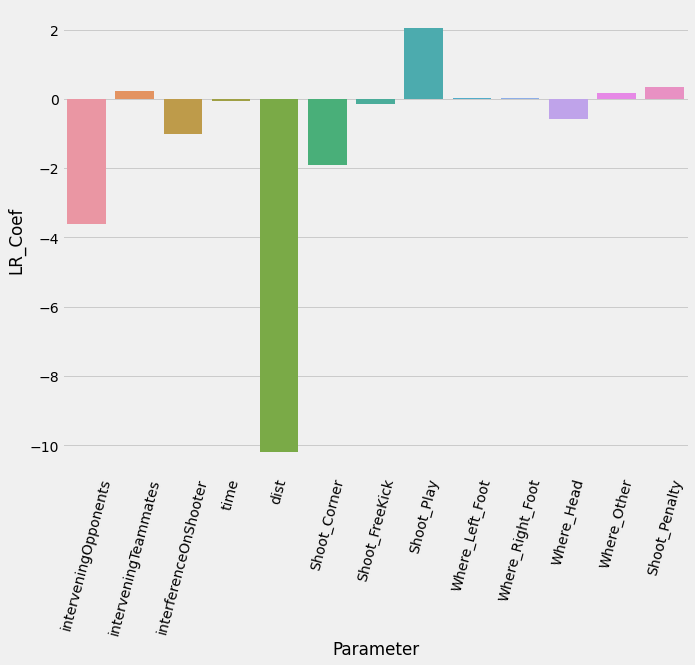

In [64]:
plt.style.use('fivethirtyeight')

temp = pd.DataFrame({'Parameter':['interveningOpponents', 'interveningTeammates', 'interferenceOnShooter',
       'time', 'dist', 'Shoot_Corner', 'Shoot_FreeKick', 'Shoot_Play', 'Where_Left_Foot', 'Where_Right_Foot', 'Where_Head', 'Where_Other','Shoot_Penalty'], 'LR_Coef':model.coef_[0]})

fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x='Parameter', y='LR_Coef', data=temp, ax=ax1)
plt.xticks(rotation=75)

In [65]:
fig.savefig(f'3/explain_LR.png', bbox_inches='tight')

## Calc Mean Prob For Each Player

In [69]:
train['Prob'] = model.predict_proba(X)[:, 1]
player_prob = train[['playerId', 'Prob']]
player_prob

,playerId,Prob
0,p_103,0.098306
1,p_16,0.067758
2,p_88,0.045864
3,p_87,0.010878
4,p_9,0.148252
...,...,...
8920,p_115,0.062020
8921,p_76,0.019151
8922,p_150,0.122503
8923,p_130,0.175206


In [77]:
player_prob_mean = player_prob.groupby('playerId').mean()
player_prob_mean

,Prob
playerId,
p_1,0.160701
p_10,0.110362
p_100,0.092991
p_101,0.196883
p_102,0.122682
...,...
p_95,0.123755
p_96,0.115141
p_97,0.130900


<AxesSubplot:ylabel='Frequency'>

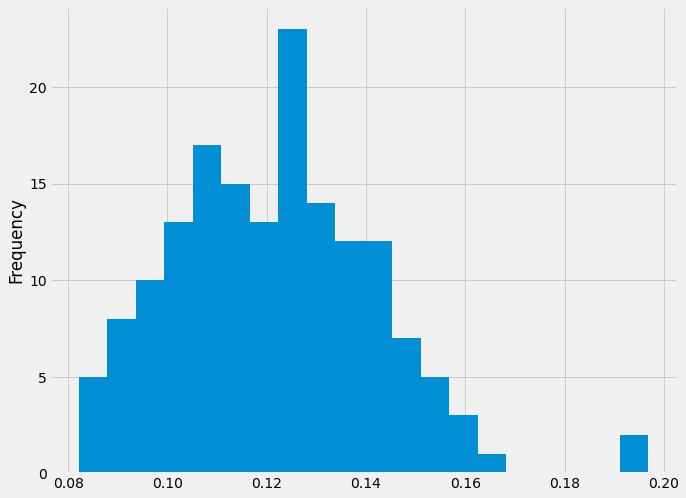

In [78]:
fig, ax1 = plt.subplots(figsize=(10, 8))
player_prob_mean.Prob.plot(kind='hist', bins=20)

In [79]:
fig.savefig(f'3/player_dist.png', bbox_inches='tight')

In [80]:
player_prob_mean.sort_values('Prob', ascending=False).head(5)

,Prob
playerId,
p_101,0.196883
p_160,0.192133
p_90,0.166647
p_156,0.161475
p_1,0.160701
